<a href="https://colab.research.google.com/github/ndb796/Deep-Learning-Basic-for-KISA/blob/master/Multivariable_Linear_Regression_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np

X = [[1, 33],
     [2, 27],
     [3, 29],
     [4, 45],
     [5, 27],
     [6, 33],
     [7, 35]]
Y = [25000, 55000, 75000, 125000, 128000, 155000, 182000]

Y = [[i] for i in Y]

x_data = torch.Tensor(X)
y_data = torch.Tensor(Y)
  
class LinearRegressionModel(torch.nn.Module): 
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__() 
        self.linear = torch.nn.Linear(input_dim, output_dim)
    def forward(self, x): 
        y_pred = self.linear(x)
        return y_pred

model = LinearRegressionModel(2, 1)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001) 
  
for epoch in range(100001):
    pred_y = model(x_data)
    loss = criterion(pred_y, y_data)
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()
    if epoch % 10000 == 0:
        print("[ epoch: %d, cost: %.2f ]" % (epoch, loss.data))
        print("w1 = %.2f, w2 = %.2f, b = %.2f" % (model.linear.weight[0][0], model.linear.weight[0][1], model.linear.bias))

print("f(x) = %.2fx1 + %.2fx2 + %.2f" % (model.linear.weight[0][0], model.linear.weight[0][1], model.linear.bias))
print("예측값: [%.2f]" % (model(torch.Tensor([[1, 33]]))))

[ epoch: 0, cost: 14059145216.00 ]
w1 = 105.27, w2 = 716.11, b = 21.48
[ epoch: 10000, cost: 44816732.00 ]
w1 = 24747.68, w2 = 303.09, b = -1554.48
[ epoch: 20000, cost: 41596492.00 ]
w1 = 24782.06, w2 = 352.08, b = -3347.59
[ epoch: 30000, cost: 38737400.00 ]
w1 = 24805.23, w2 = 399.37, b = -5037.36
[ epoch: 40000, cost: 36198428.00 ]
w1 = 24827.07, w2 = 443.93, b = -6629.72
[ epoch: 50000, cost: 33943916.00 ]
w1 = 24847.64, w2 = 485.92, b = -8130.19
[ epoch: 60000, cost: 31941776.00 ]
w1 = 24867.26, w2 = 525.46, b = -9544.25
[ epoch: 70000, cost: 30163916.00 ]
w1 = 24886.79, w2 = 562.59, b = -10876.73
[ epoch: 80000, cost: 28585070.00 ]
w1 = 24904.98, w2 = 597.61, b = -12132.42
[ epoch: 90000, cost: 27182916.00 ]
w1 = 24921.21, w2 = 630.73, b = -13315.87
[ epoch: 100000, cost: 25937966.00 ]
w1 = 24936.50, w2 = 661.93, b = -14430.92
f(x) = 24936.50x1 + 661.93x2 + -14430.92
예측값: [32349.38]


In [ ]:
print("예측값: [%.2f]" % (model(torch.Tensor([[8, 33]]))))

예측값: [206904.86]


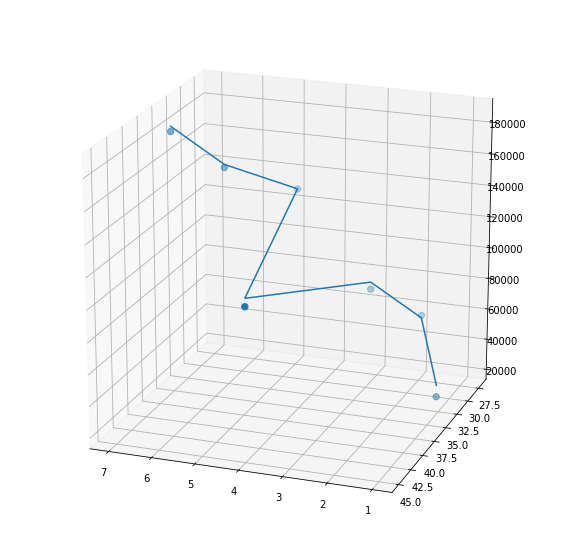

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.view_init(20, 110)

x1 = [1, 2, 3, 4, 5, 6, 7]
x2 = [33, 27, 29, 45, 27, 33, 35]
y = [25000, 55000, 75000, 110000, 128000, 155000, 180000]
ax.scatter(x1, x2, y, s=40)

y_pred = [model(torch.Tensor(i)).tolist()[0] for i in X]
ax.plot(x1, x2, y_pred)